![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Studying the influence of atmospheric circulation on upper tropospheric humidity

Production date: 04-04-2025

Produced by: CNRS

## 🌍 Use case: observing the moisture content of the atmosphere and making the link with large scale circulation in the tropics.

## ❓ Quality assessment question:
 - __How well can satellite measurements reproduce the known relationship between large-scale circulation and upper tropospheric humidity (UTH)?__

Water vapor in the mid- to upper troposphere, while representing a small fraction of the total column, has
a significant impact on the Earth's radiative budget thanks to its radiative and thermodynamical properties.  In the tropics, the distribution of upper tropospheric humidity (UTH) is primarily controlled by large-scale transport, with influences by storm systems in the deep tropics [[1]](https://doi.org/abs/10.1029/97GL03563)

The atmospheric circulation is the large-scale movement of air through the Earth's atmosphere, driven by the uneven heating of the planet's surface by the sun. This circulation is responsible for distributing heat and moisture around the globe, shaping weather patterns and climate.
The movement of the air masses influences the distribution of humidity in the upper troposphere. In regions where air rises, such as the  Inter Tropical Convergence Zone, moisture from the lower atmosphere is transported upward, increasing humidity in the upper troposphere.
Conversely, in regions where air sinks, the upper troposphere becomes drier.

This notebook aims to examine the dependency of upper tropospheric humidity on the global atmospheric circulation. Specifically, it seeks to verify if the UTH dataset can reproduce this dependency in agreement with [[2]](https://doi.org/10.1029/2006GL029118). The analysis will compare the dataset's findings with established results to ensure consistency and reliability in representing the atmospheric dynamics.

The analysis is performed using the dataset __Upper tropospheric humidity gridded data from 1999 to present derived from satellite observations__  [[described here]](https://cds.climate.copernicus.eu/datasets/satellite-upper-troposphere-humidity) available on the Climate Data Store of the Copernicus Climate Change Service. 


## 📢 Quality assessment statement 

```{admonition} These are the key outcomes of this assessment
:class: note

- The analysis is done with year 2001 using monthly data over the tropical regions. The UTH dataset reproduces the known relationship between the atmospheric moisture and the tropical large-scale atmospheric circulation: ascending motions moisten the upper troposphere, whereas subsiding motions dry it. The amplitude and frequency of moist and dry situations are consistent with the literature [[2]](https://doi.org/10.1029/2006GL029118).

- The tested subset of the UTH dataset shows little month-to-month variability over the year, in agreement with the known link between atmospheric circulation regimes and UTH which is independent on the season. 

- Some slight discrepancies with the literature arise and can be explained : 

    - differences in the amplitude and frequency of the vertical velocity at 500hPa : the quality assessment uses ERA5 reanalyses while the literature relied on former versions of reanalysis (ERA40 and NCEP/NCAR reanalyses, see [[2]](https://doi.org/10.1029/2006GL029118) and [[3]](https://doi.org/10.1007/s00382-003-0369-6)).
    
    - differences in the amplitude of UTH : the retrieval method of the UTH of the CDS data record [[see the ATBD]](https://confluence.ecmwf.int/pages/viewpage.action?pageId=288339045) is not strictly identical to the reference paper [[2]](https://doi.org/10.1029/2006GL029118).

```


## 📋 Methodology

The link between upper tropospheric humidity (UTH) and large-scale circulation is examined using only the vertical atmospheric motion in the mid-troposphere at 500hPa (noted $\omega_{500}$) available from the Climate Data Store and detailed below.

The UTH data over the __tropics__ is downloaded for the full year 2001.

### Upper Tropospheric Humidity
The Upper Tropospheric Humidity (UTH) is a direct interpretation of the satellite measurements in strong water vapor absorption lines, such as those in the infra-red band at 6.2µm and in the micro-wave in the 183.31GHz line. Indeed, at these wavelengths, the emission to space is explained by water vapor concentration and temperature (see early studies by [[4]](https://doi.org/10.1175/1520-0450%281988%29027%3C0889:EOTUTR%3E2.0.CO;2) and [[5]](https://doi.org/10.1029/93JD01283)).
Upon some simple assumptions on the local vertical lapse rate of the troposphere and on the behaviour of the absorption spectral lines, the UTH is obtained via a log-linear equation from the satellite measurement (brightness temperature, $TB$ in Kelvins):

  $$
  \text{ln}( \ UTH \ ) = a + b \cdot TB
  $$

Physically, the UTH is a vertical integration of the relative humidity, weighted by the vertical sensitivity of the measurement to water vapor distribution. It is therefore expressed in the unit of %, the S.I. unit of relative humidity, and, as such, is interpreted in the same way.

The computation of the regression parameters $a$ and $b$ is done thanks to a statistically representative dataset (see [[5]](https://doi.org/10.1029/93JD01283), [[6]](https://doi.org/10.1029/2007JD009314), [[7]](https://doi.org/10.1175/2009JCLI2963.1), [[8]](https://acp.copernicus.org/articles/14/11129/2014/)), and the values depend on the definition of UTH itself. It also depends on the spectral domain (infra-red of microwave).

UTH may be prefered over vertically resolved relative humidity profiles, provided for example by reanalyses such as ERA5, when the vertical resolution is not a key parameter and when independence from a modeling framework is sought ([[9]](https://acp.copernicus.org/articles/7/2489/2007/), [[10]](https://doi.org/10.1175/JCLI-D-19-0046.1)).


### Method

Both variables (UTH and $\omega_{500}$) are averaged monthly to smooth out short-term fluctuations caused by convection. The parameter $\omega_{500}$ is extracted from ERA5 reanalyses (see below). ERA5 data resolution is reduced from 0.25 degree to 1 degree to match the resolution of the UTH data. After collocating the monthly values at this resolution, the UTH values are categorized into bins based on the vertical velocities. The distribution of UTH within each bin is presented as a boxplot profile, providing a clear visualization of how UTH varies with changes in vertical velocity.

The analysis comprises the following steps:

__1. [](satellite_satellite-upper-troposphere-humidity_validation_q01:data-section-1)__
 - Import the relevant packages.
 - Define the parameters of the analysis and set the dataset requests

__2. [](satellite_satellite-upper-troposphere-humidity_validation_q01:data-section-2)__
 - Download the variables of interest: Upper tropospheric Humidity is obtained from __Upper tropospheric humidity gridded data from 1999 to present derived from satellite observations__  [[UTH]](https://cds.climate.copernicus.eu/datasets/satellite-upper-troposphere-humidity), Vertical component of wind $\omega_{500}$ is obtained from __ERA5 hourly data on pressure levels from 1940 to present__ [[ERA5]](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview).
 -  ERA5 $\omega_{500}$ is regridded to align with the resolution of UTH and its unit is converted from hPa/s to hPa/day to be consistent with published references.
 -  The datasets are colocated in space and time over the Tropics.
 -  Monthly averages are used.
   
__3. [](satellite_satellite-upper-troposphere-humidity_validation_q01:Analysis-section-1)__
 -  Maps and histograms of UTH and $\omega_{500}$ are described at the monthly scale for the whole year 2001.
   
__4. [](satellite_satellite-upper-troposphere-humidity_validation_q01:Plot-and-results)__
 -  The composite of UTH is shown as a function of $\omega_{500}$. The final results are compared with the appropriate references and the sources of differences are discussed.

## 📈 Analysis and results

(satellite_satellite-upper-troposphere-humidity_validation_q01:data-section-1)=
### Choose the parameters to use and setup code

#### **Import packages**

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.stats import linregress
from xhistogram.xarray import histogram

import math
import numpy as np 
from c3s_eqc_automatic_quality_control import diagnostics, download, plot

plt.style.use("seaborn-v0_8-notebook")

import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/helene_brogniez/.cdsapirc")

#### **Define parameters**

This use case is developed for one year of data (2001) and for the tropical belt, restricted to 30$^\circ$S-30$^\circ$N.

In [2]:
# Time
start = "2001-01"
stop = "2001-12"

# Region:
lat_min = -30
lat_max = 30
lon_min = -180
lon_max = 180

#### **Set the data request**

Two datasets are requested :
- Upper Tropospheric Humidity (UTH)
- Vertical atmospheric velocity at 500hPa ($\omega_{500}$)

In [3]:
chunks = {"year": 1, "month": 1}  # nb of years, nb of months
requests = dict()

requests["satellite-upper-troposphere-humidity"] = {
    "sensor_on_satellite": "amsu_b_on_noaa_16",
    "year": ["2001"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "variable": "all",
    "area": [30, -180, -30, 180]
}

requests["reanalysis-era5-pressure-levels"] = {
    "product_type": ["reanalysis"],
    "variable": ["vertical_velocity"],
    "pressure_level": ["500"],
    "year": ["2001"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [30, -180, -30, 180]
}

(satellite_satellite-upper-troposphere-humidity_validation_q01:data-section-2)=
### Download the datasets and perform space-time aggregation

The datasets are now downloaded.

In [4]:
datasets = {}

for collection_id in requests :
    request = requests[collection_id]
    datasets[collection_id] =  download.download_and_transform(
                                    collection_id,
                                    download.update_request_date(request | {'area': [lat_max, lon_min, lat_min, lon_max]}, #[N, W, S, E]
                                                                 start, 
                                                                 stop, 
                                                                 stringify_dates=True),
                                        chunks=chunks,
                                    )

100%|██████████| 12/12 [00:00<00:00, 21.19it/s]


#### **Temporal and spatial aggregation**

All data records are provided at different spatial and temporal resolutions : 
- Upper Tropospheric Humidity : 1$^\circ$ / 1-day
- Vertical atmospheric velocity at 500hPa ($\omega_{500}$) : 0.25$^\circ$ / 1-hour
    
Since this is a cross-variable analysis, the study requires to process all the datasets at the same horizontal and temporal resolutions. 

Note that for the UTH data record, two manipulations of the latitude $\times$ longitude grid are done : first a reversal of the latitudes since the data is stored South-to-North (North-to-South for ERA5 $\omega_{500}$), and second a change of the longitude values since they range from 0° to 360° (-180° to 180° for ERA5 $\omega_{500}$) .

The common spatial aggregation is thus 1$^\circ$ and the data records are processed at the monthly scale. 

In [5]:
# coarsen datasets to 1° grid / 1-month
ds_tmp = (datasets["satellite-upper-troposphere-humidity"].resample(time='1ME').mean())
ds_uth  = ds_tmp.reindex(latitude=list(reversed(ds_tmp.latitude)))  # latitudes original stored from -90° to + 90°

with xr.set_options(keep_attrs=True):
    ds_uth["longitude"]= (ds_uth["longitude"] + 180) % 360 - 180. # change original 0-360 longitudes into -180 +180 longitudes

ds_omega500 = (datasets["reanalysis-era5-pressure-levels"].resample(time='1ME').mean().coarsen(latitude=4, longitude=4, boundary="pad").mean())

#### **Change of unit for vertical velocity**
Most scientific studies focusing on the large-scale atmospheric circulation use __hPa/day__ as the unit for the upward atmospheric wind (see [[3]](https://doi.org/10.1007/s00382-003-0369-6)), since it offers a more meaningful unit at the considered time scale.

In [6]:
## from Pa/s to hPa/day
with xr.set_options(keep_attrs=True):
    ds_omega500["w"] *= 24 * 36

## and the unit in the dataset is changed accordingly
ds_omega500.attrs["units"] = "hPa / day"

#### **Organisation of the data**

In [7]:
## Creation of a dataframe that keeps also the information of each month to study the month-to-month variability
series = {}
months = None
datasets = [
    (ds_omega500["w"], "w"),
    (ds_uth["uth_mean_ascend_descend"], "uth_mean_ascend_descend")
]

for da, name in datasets:
    # sort and stack the data
    stacked = da.sortby(list(da.dims)).stack(index=sorted(da.dims))
    # convert into a serie
    s = stacked.to_series().reset_index()
    # extraction of the month
    s["month"] = s["time"].dt.month
    # storage
    series[name] = s[da.name]
    if months is None:
        months = s["month"]

# Creation of the dataframe
df_monthly = pd.DataFrame(series)
df_monthly["month"] = months.values
# Supression of missing values
df_monthly = df_monthly.dropna()

(satellite_satellite-upper-troposphere-humidity_validation_q01:Analysis-section-1)=
### Overview of the geophysical variables of interest

#### **Upper Tropospheric Humidity**

The Upper Tropospheric Humidity (UTH, in %) is a single-layer geophysical variable provided by EUMETSAT on a 1°$\times$1° regular grid. 

The UTH data record of the CDS relies on measurements from the 183.31±1 GHz channels of the Advanced Microwave Sounding Unit-B (AMSU-B) and the Microwave Humidity Sounder (MHS) on board the NOAA- and MetOp- satellite series. The present use case analyses the AMSU-B data of the NOAA-16 satellite.

For the 183GHz microwave channel the UTH is retrieved under all situations, except where measurements are influenced by surface (high orography or extremely dry atmospheric conditions), or when there is a deep convective storm with large ice particules (see [[2]](https://doi.org/10.1029/2006GL029118), [[6]](https://doi.org/10.1029/2007JD009314)).

The map below shows the UTH for July 2001.

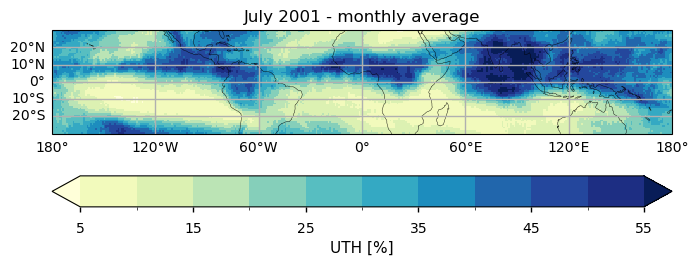

In [8]:
plot.projected_map(
    ds_uth.isel(time=6).compute()["uth_mean_ascend_descend"],
    projection=ccrs.PlateCarree(),
    cmap="YlGnBu",
    robust=True,
    center=False,
    levels=12,
    extend="both",
    cbar_kwargs={
        "orientation": "horizontal",
        "pad": 0.1, 
        "label": "UTH [%]"
    },
    show_stats=False
    )
plt.title("July 2001 - monthly average")
plt.show()

*Figure 1: Monthly average of UTH (in % of relative humidity) for July 2001.*

As expected (see [[5]](https://doi.org/10.1029/93JD01283), [[8]](https://acp.copernicus.org/articles/14/11129/2014/)) high UTH values are associated to monsoonal regions of strong storms that bring upward a high amount of moisture : in the Eastern Pacific, over West Africa and in the Indian Ocean and Indonesia (known as the Warm Pool).
On the other side of the UTH range, a drier atmosphere is visible in the continental desert regions, and more generally in both hemispheres, North and South of the Monsoonal regions.

#### **Atmospheric vertical velocity at 500 hPa**

The map below shows the $\omega_{500}$ for the same month of July 2001, overlayed with contours of UTH of the same month.

Text(0.5, 1.0, 'July 2001 - monthly average')

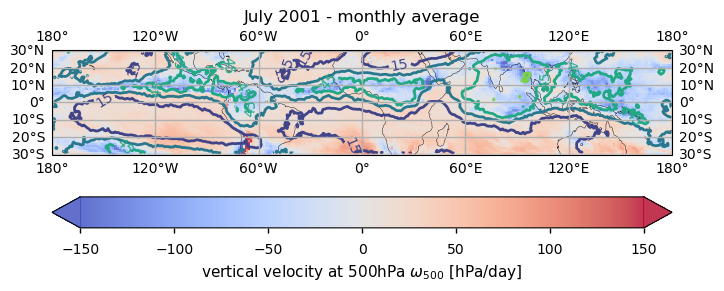

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ds_omega500.isel(time=6, pressure_level=0)["w"].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    robust=True,
    center=False,
    vmin=-150,
    vmax=+150,
    alpha=0.8,
    extend="both",
    cbar_kwargs={
        "orientation": "horizontal",
        "pad": 0.1,
        "label": "vertical velocity at 500hPa $\\omega_{500}$ [hPa/day]",
    },
)

line_c = ds_uth.isel(time=6)["uth_mean_ascend_descend"].plot.contour(
    ax=ax,
    center=False,
    linewidths=2,
    levels=5,
)
ax.clabel(line_c, [15,45], inline=1, fontsize=10)
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_title("July 2001 - monthly average")

*Figure 2: Monthly average of the vertical velocity at 500hPa (in hPa/day) for July 2001, from the ERA5 reanalyses. The overlaid contours are UTH from Figure 1.*

Negative values of $\omega_{500}$ indicate ascending motions, while positive values indicate descending motions. 

The contours of UTH, overlayed on the map, help to interpret the structures.

From the general atmospheric circulation, ascending motions ($\omega_{500}$ < 0) are regions where storms form by convection. These regions form the moist Inter-Tropical Convergence Zone (ITCZ), a region of strong convergence of the surface winds of the Hadley cells. The convective storms moisten the troposphere by bringing upward the moisture from the boundary layer.

Descending motions ($\omega_{500}$ > 0) are dry regions that are free of storm clouds and are mainly located over the subtropics (near 20°S - 20°S). In these subsidence regions, the air sinks and warms adiabatically without changing its water vapour content, thus decreasing the rate of relative humidity. 

Therefore, $\omega_{500}$ serves to define __large-scale circulation regimes__, as stated in [[3]](https://doi.org/10.1007/s00382-003-0369-6), extremely useful to decompose the dynamical structure of the tropical atmosphere and to analyze its properties (for the purpose of studying trends in precipitation [[11]](https://doi.org/10.1256/qj.04.176) or for the purpose of studying cloud radiative forcing [[3]](https://doi.org/10.1007/s00382-003-0369-6), among other applications). Many studies use this framework to assess global climate models ([[2]](https://doi.org/10.1029/2006GL029118), [[3]](https://doi.org/10.1007/s00382-003-0369-6), [[11]](https://doi.org/10.1256/qj.04.176)).

The following density histogram illustrates the probability density function (PDF) of $\omega_{500}$ for the full year 2001.

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/data/wp5/.tmp/ipykernel_851463/2054132186.py:18: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('circulation regimes - $\omega_{500}$ [hPa/day]')


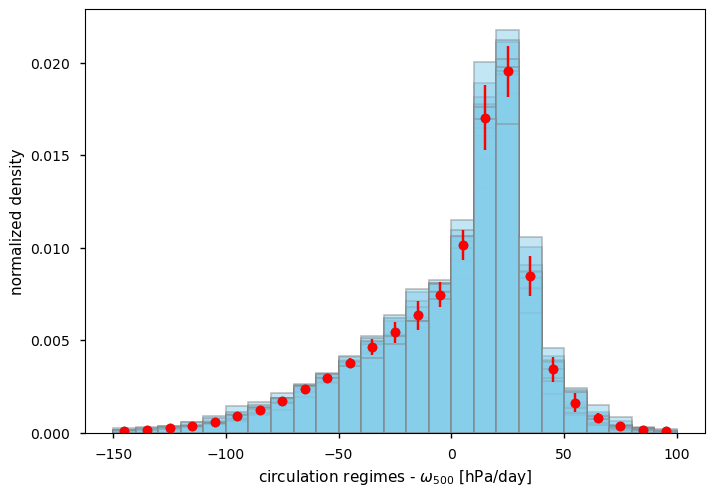

In [10]:
nb=25 ## number of bins for the histogram
nm=12 ## number of months : 12 (1 year)
pdf = []
for i in range(nm):
    data = ds_omega500.isel(time=i, pressure_level=0).compute().w.data.flatten()
    entries, bin_edges, _ = plt.hist(data, bins=nb, range=(-150,100), color="skyblue", edgecolor='grey', linewidth=1.2, density=True, alpha=0.5)
    pdf.append(entries)

pdf=np.array(pdf)
mean_pdf = pdf.mean(axis=0,keepdims=True) ## mean of monthly pdfs
std_pdf = pdf.std(axis=0,keepdims=True)   ## standard deviation from monthly pdfs
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.plot(bin_centers, mean_pdf[0,], "o")
plt.errorbar(bin_centers, mean_pdf[0,], yerr = std_pdf, fmt ='o', color="red")

plt.ylabel('normalized density')
plt.xlabel('circulation regimes - $\omega_{500}$ [hPa/day]')
plt.show()

*Figure 3: Probability density functions (PDF) of the monthly $\omega_{500}$ for the year 2001 in the tropics (30°N - 30°S). Each light-blue PDF is for one given month. The red marks and vertical bars show the average PDF for year 2001 and the associated standard deviation, considered as the uncertainty, within each 10-hPa bin.*

Overall the distribution of $\omega_{500}$ is negatively skewed, with a peak around 20 hPa/day. This peak, compliant with [[3]](https://doi.org/10.1007/s00382-003-0369-6), shows that the tropics are dominated by a weak subsiding motion found in the subtropics and in the western parts of the ocean basins.
The negative tail reflects the magnitude of vertical motions within clouds.
The small vertical bars highlight the small temporal variability in the occurrence of each bins of $\omega_{500}$ throughout the year.

(satellite_satellite-upper-troposphere-humidity_validation_q01:Plot-and-results)=
### Plot and description of the results

#### Variation of UTH with the vertical velocity at 500hPa

For a given latitude$\times$longitude$\times$month the UTH is associated a value of $\omega_{500}$, defining a circulation regime, and each bin of $\omega_{500}$ groups all UTH for this particular regime.

The entire year 2001 is considered, and month-to-month variability is presented. 

<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/data/wp5/.tmp/ipykernel_851463/1413871535.py:25: SyntaxWarning: invalid escape sequence '\o'
  xlabel="circulation regimes - $\omega_{500}$ [hPa/day]",


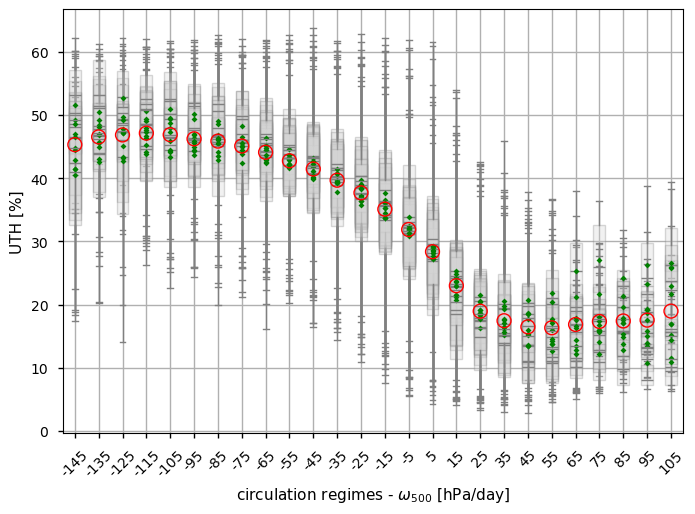

In [13]:
bin_edges = np.array(range(-150, 120, 10))
bin_labels = pd.Series(bin_edges).rolling(2).mean()[1:].astype(int).astype(str)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

nm=12 ## number of months : 1 year
total_bin_means = []

for i in range(nm):
    df_extract = df_monthly.loc[df_monthly["month"]==i]
    grouper = pd.cut(df_extract["w"], bin_edges)
    ## mean within each bin
    bin_means = df_extract.groupby(grouper, observed=False)["uth_mean_ascend_descend"].mean()
    total_bin_means.append(bin_means)
    ax = df_extract.groupby(grouper, observed=False).boxplot(
        subplots=False,
        column="uth_mean_ascend_descend",
        showfliers=False,
        patch_artist=True,
        showmeans=True,
        medianprops={"linewidth": 1, "color": "grey"},
        meanprops={"marker": "D", "markeredgecolor": "grey", "markerfacecolor": "green", "markersize": 3},
        whiskerprops={"color": "grey"},
        capprops={"color": "grey"},
        boxprops={"color": "grey", "facecolor": "lightgrey", "alpha":0.3},
        xlabel="circulation regimes - $\omega_{500}$ [hPa/day]",
        ylabel="UTH [%]",
        grid=True,
        positions=range(len(bin_labels)),
    )
    ax.set(xticklabels=[])
    
df_total_bin_means = pd.DataFrame(total_bin_means)
mean_of_means = df_total_bin_means.mean(axis=0)

_= ax.set_xticklabels(ax.get_xticks(), rotation=45)
_= ax.set_xticks(range(len(bin_labels)))
_= ax.set_xticklabels(bin_labels)

for pos, mean_val in enumerate(mean_of_means):
    ax.scatter(pos, mean_val, color='red', s=100, marker='o', facecolors='none', linewidth=1.0, zorder=3)

*Figure 4: Evolution of UTH upon different circulation regimes of the tropics, defined by 10-hPa bins of $\omega_{500}$, for each month of year 2001. For each bin of $\omega_{500}$, a box-and-whiskers diagram is used to show the month-to-month variability: the gray boxes are the interquartiles and the median are in grey. The green symbols represent the mean of the UTH of each bin of the given months. The red circles are the mean of the means (ie the annual mean) within each bin.*

Overall the results are in agreement with Figure 1 of [[2]](https://doi.org/10.1029/2006GL029118), which associates the retrieved monthly UTH from NOAA-16 to the vertical velocity at 500hPa, but for only 2 months of data which are November and December 2001. In agreement with this study, the UTH shows a sharp transition from convergence regions to subsidence regions. The UTH value remains stable at around 20% over regions where $\omega_{500}$ exceeds 30 hPa/day.

Figure 4 shows that there is little month-to-month variability within a given circulation regime, the largest variability being observed in the extreme ascending regimes, for $\omega_{500}$ > 55 hPa/day. This is essentially explained by the small occurrence of such regimes, as visible on Figure 1.

Caution must be taken though when comparing the occurence of circulation regimes between the present use case and the literature : the use case is based on ERA5 vertical velocity while the literature ([[2]](https://doi.org/10.1029/2006GL029118) and [[3]](https://doi.org/10.1007/s00382-003-0369-6)) rely on former versions of ECMWF reanalysis ERA40 ([[11]](https://doi.org/10.1256/qj.04.176)) and NCEP/NCAR reanalyses ([[12]](https://doi.org/10.1175/1520-0477%281996%29077<0437:TNYRP>2.0.CO;2)). 
 
Here, the UTH reaches a plateau of maximum value of approximately 45-50% when upward motions reach -60 hPa/day. The reference reports slightly lower values, which still fall within the UTH distribution observed in this study. The discrepancies between these results and those presented in [[2]](https://doi.org/10.1029/2006GL029118) can arise from the following reasons:

- The retrieval method for UTH is similar, based on a simple linear equation ([[2]](https://doi.org/10.1029/2006GL029118), [[4]](https://doi.org/10.1175/1520-0450%281988%29027%3C0889:EOTUTR%3E2.0.CO;2)) (see also the __"Methodology"__ section):

  $$
  \text{ln}(UTH) = a + b \cdot TB
  $$

however, the regression coefficients $a$ and $b$ used to obtain the UTH from the TB measured by the instrument are not identical between the UTH dataset of the CDS [[see the ATBD]](https://confluence.ecmwf.int/pages/viewpage.action?pageId=288339045) and the UTH of the reference paper [[2]](https://doi.org/10.1029/2006GL029118), which may explain some of the differences in the binned UTH per $\omega_{500}$. Firstly, those parameters are computed using offline radiative transfer codes that have some discrepancies in the water vapor absorption channels (see for instance [[[14]](https://journals.ametsoc.org/view/journals/bams/81/4/1520-0477_2000_081_0797_aiorcf_2_3_co_2.xml), [[15]](https://www.wcrp-climate.org/resources/wcrp-publications/1095-pub-2017)). Secondly, the dataset used to compute the regression coefficients, and considered as a reference dataset, is built from different sources : a collecti .

- The results in [[2]](https://doi.org/10.1029/2006GL029118) are based on only two months of data with former versions of reanalyses, which could lead to discrepancies in the amplitudes and occurences when compared to our more comprehensive dataset, even if limited to only one year.

## ℹ️ If you want to know more
### Key resources
Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used is:
- Upper tropospheric humidity gridded data from 1999 to present derived from satellite observations:
https://cds.climate.copernicus.eu/datasets/satellite-upper-troposphere-humidity

- ERA5 hourly data on pressure levels from 1940 to present:
https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels

Code libraries used:
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`, prepared by [B-Open](https://www.bopen.eu/)

And more resources on tropical atmosphere, large-scale circulation and upper tropospheric humidity :

- https://www.nature.com/scitable/knowledge/library/tropical-weather-84224797/

- Additonal scientific articles on Upper Tropospheric Humidity :

  - IPCC Assessment Report 4, 2007 : 3.4.2.2 Upper Tropospheric Water Vapor, in WG1: The Physical Science Basis, https://archive.ipcc.ch/publications_and_data/ar4/wg1/en/ch3s3-4-2-2.html
  - Shi, L., Schreck III, C. J., John, V. O., Chung, E.-S., Lang, T., Buehler, S. A., and Soden, B. J., 2022: Assessing the consistency of satellite-derived upper tropospheric humidity measurements, Atmos. Meas. Tech., 15, 6949–6963, https://doi.org/10.5194/amt-15-6949-2022
  - Chung E., B. Soden, B.J. Sohn, and L. Shi, 2014: Upper-tropospheric moistening in response to anthropogenic warming, Proc. Natl. Acad. Sci. U.S.A. 111 (32) 11636-11641, https://doi.org/10.1073/pnas.1409659111  

### References

[[1]](https://doi.org/abs/10.1029/97GL03563) Pierrehumbert R. T (1998), Lateral mixing as a source of subtropical water vapor, Geophys. Res. Lett., 25, 151-154, doi:10.1029/97GL03563 

[[2]](https://doi.org/10.1029/2006GL029118) Brogniez, H., and R. T. Pierrehumbert (2007), Intercomparison of tropical tropospheric humidity in GCMs with AMSU-B water vapor data, Geophys. Res. Lett., 34, L17812, doi:10.1029/2006GL029118.

[[3]](https://doi.org/10.1007/s00382-003-0369-6) Bony, S., Dufresne, JL., Le Treut, H. et al. (2004), On dynamic and thermodynamic components of cloud changes. Climate Dynamics 22, 71–86. doi:10.1007/s00382-003-0369-6

[[4]](https://doi.org/10.1175/1520-0450%281988%29027%3C0889:EOTUTR%3E2.0.CO;2) Schmetz J. and O. Turpeinen (1988), Estimation of the Upper Tropospheric Relative Humidity Field from METEOSAT Water Vapor Image Data, J. Appl. Meteor. Clim., 27, 8, 889-899. doi:10.1175/1520-0450(1988)027%3C0889:EOTUTR%3E2.0.CO;2.

[[5]](https://doi.org/10.1029/93JD01283) Soden B. and F. Bretherton (1993), Upper tropospheric relative humidity from the GOES 6.7 μm channel: Method and climatology for July 1987, J. Geophys. Res, 98, D9, 16,669-16,688. doi:/10.1029/93JD01283.

[[6]](https://doi.org/10.1029/2007JD009314) Buehler, S. A., M. Kuvatov, V. O. John, M. Milz, B. J. Soden, D. L. Jackson, and J. Notholt (2008), An upper tropospheric humidity data set from operational satellite microwave data, J. Geophys. Res., 113, D14110, doi:10.1029/2007JD009314.

[[7]](https://doi.org/10.1175/2009JCLI2963.1) Brogniez H., R. Roca and L. Picon (2009), A study of the free tropospheric humidity interannual variability using Meteosat data and an advection–condensation transport model, J. Clim., 22, 24, 6773–6787, doi:10.1175/2009JCLI2963.1.

[[8]](https://acp.copernicus.org/articles/14/11129/2014/) Schröder, M., R. Roca, L. Picon, A. Kniffka, and H. Brogniez (2014) Climatology of free tropospheric humidity: extension into the SEVIRI era, evaluation and exemplary analysis, Atmos. Chem. Phys., 14, 11129-11148, doi:10.5194/acp-14-11129-2014.

[[9]](https://acp.copernicus.org/articles/7/2489/2007/) Chung E.S., B. J. Sohn, J. Schmetz and M. Koening (2007) Diurnal variation of upper tropospheric humidity and its relations to convective activities over tropical Africa, Atmos. Chem. Phys., 7, 2489–2502, doi:10.5194/acp-7-2489-2007.

[[10]](https://doi.org/10.1175/JCLI-D-19-0046.1) Tivig M., V. Grützun, V. O. John and S. Buehler (2020), Trends in upper-tropospheric humidity: expansion of the subtropical dry zones? J. Clim. 33, 6, 2149–2161, doi:10.1175/JCLI-D-19-0046.1.

[[11]](https://doi.org/10.1256/qj.04.176) Uppala S. and co authors (2005), The ERA-40 re-analysis, Q. J. R. Meteorol. Soc., 31, 2961– 3012, doi: 10.1256/qj.04.176.

[[12]](https://doi.org/10.1175/1520-0477%281996%29077<0437:TNYRP>2.0.CO;2) Kalnay E and co authors (1996) The NCEP/NCAR 40-year reanalysis project. Bull. Am. Meteorol. Soc., 77, 437–471, doi:10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2.

[[13]](https://iopscience.iop.org/article/10.1088/1748-9326/5/2/025205/meta) Allan R., B. Soden, V. John, W. Ingram and P. Good (2010) Current changes in tropical precipitation, Environ. Res. Lett., 5, 025205, doi:10.1088/1748-9326/5/2/025205.

[[14]](https://journals.ametsoc.org/view/journals/bams/81/4/1520-0477_2000_081_0797_aiorcf_2_3_co_2.xml) Soden, B., and coauthors (2000), An Intercomparison of Radiation Codes for Retrieving Upper-Tropospheric Humidity in the 6.3-μm Band: A Report from the First GVaP Workshop. Bull. Amer. Meteor. Soc., 81, 797–808. doi:10.1175/1520-0477%282000%29081<0797:AIORCF>2.3.CO;2 

[[15]](https://www.wcrp-climate.org/resources/wcrp-publications/1095-pub-2017) Schroeder, M., M. Lockhoff, L. Shi, T. August, R. Bennartz, E. Borbas, H. Brogniez, X. Calbet, S. Crewell, S. Eikenberg, F. Fell, J. Forsythe, A. Gambacorta, K. Graw, S.-P. Ho, H. Hoeschen, J. Kinzel, E. R. Kursinski, A. Reale, J. Roman, N. Scott, S. Steinke, B. Sun, T. Trent, A. Walther, U. Willen, Q. Yang, 2017: GEWEX water vapor assessment (G-VAP). WCRP Report 16/2017, World Climate Research Programme, Geneva, Switzerland, 216 pp.